In [12]:
import pandas as pd

def build_df(store_nbr, family):
    """
    Returns a combined DF with date, sales, oil for a given store_number and family
    """
    train_df = pd.read_csv('train.csv')
    oil_df = pd.read_csv('oil.csv')

    filtered_train_df = train_df[(train_df['store_nbr'] == store_nbr) & (train_df['family'] == family)][['date', 'sales']]

    filtered_train_df['date'] = pd.to_datetime(filtered_train_df['date'])
    oil_df['date'] = pd.to_datetime(oil_df['date'])

    merged_df = pd.merge(filtered_train_df, oil_df, on='date', how='left')

    merged_df = merged_df.rename(columns={"dcoilwtico": "oil"})
    
    return merged_df

In [11]:
df = build_df(44, "PRODUCE")

1684


In [13]:
df["oil"] = df["oil"].interpolate(method="linear")

In [24]:
(df['sales'].iloc[:74] == 0).sum() #get rid of all missing data 
df = df[74:]

1610

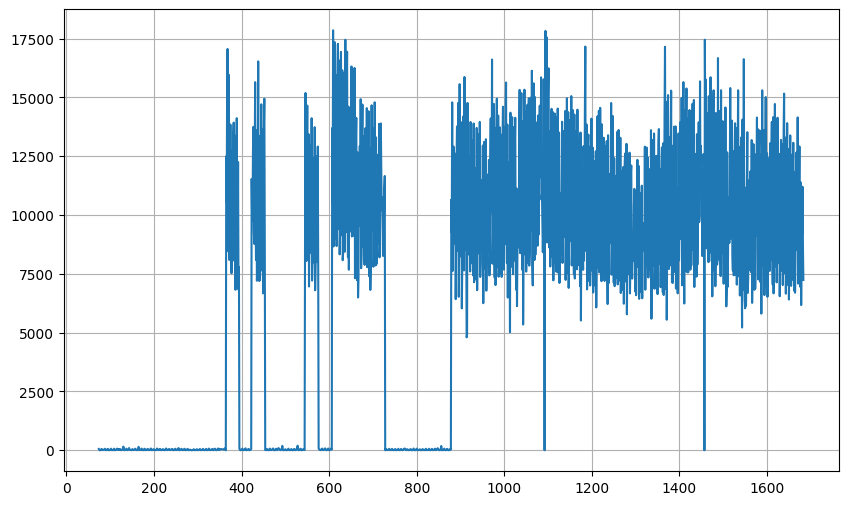

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['sales'], linestyle='-')
plt.grid(True)
plt.show() 